<a href="https://colab.research.google.com/github/DjengoFang/Financial-Engineering-Ruppert-Matteson-/blob/main/Lab4.10.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import shapiro
from scipy.stats import t
from scipy.stats import norm
import statsmodels.api as sm
import pylab as py
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/DjengoFang/Financial-Engineering-Ruppert-Matteson-/main/datasets/EuStockMarkets.csv'
data = pd.read_csv(url)
data.head(5)

,DAX,SMI,CAC,FTSE
0,1628.75,1678.1,1772.8,2443.6
1,1613.63,1688.5,1750.5,2460.2
2,1606.51,1678.6,1718.0,2448.2
3,1621.04,1684.1,1708.1,2470.4
4,1618.16,1686.6,1723.1,2484.7


# Problem 1

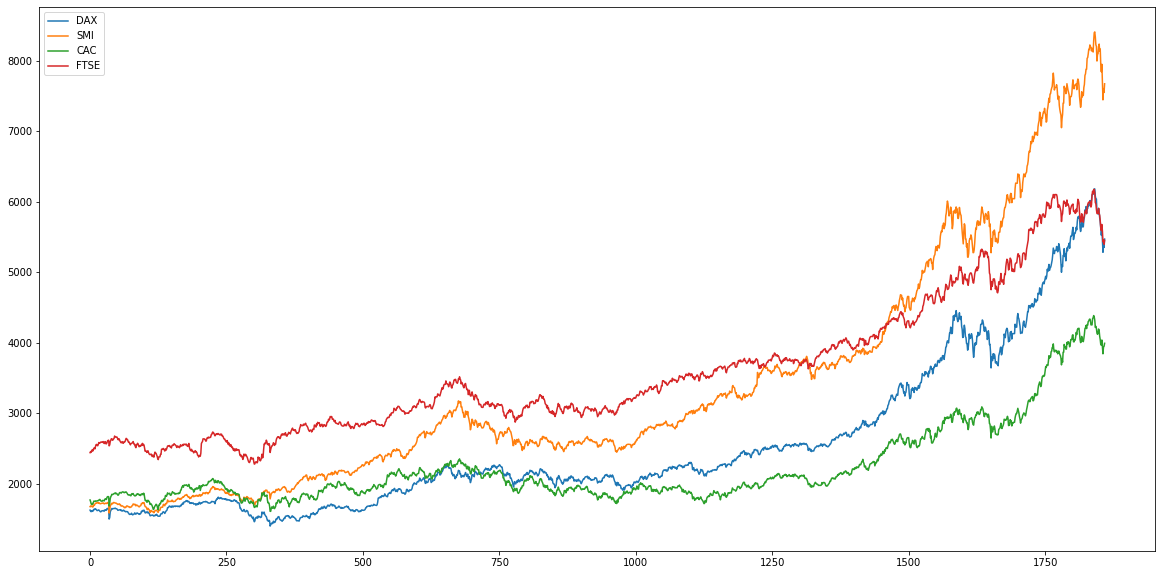

In [3]:
data.plot(figsize=(20, 10))

# Problem 2

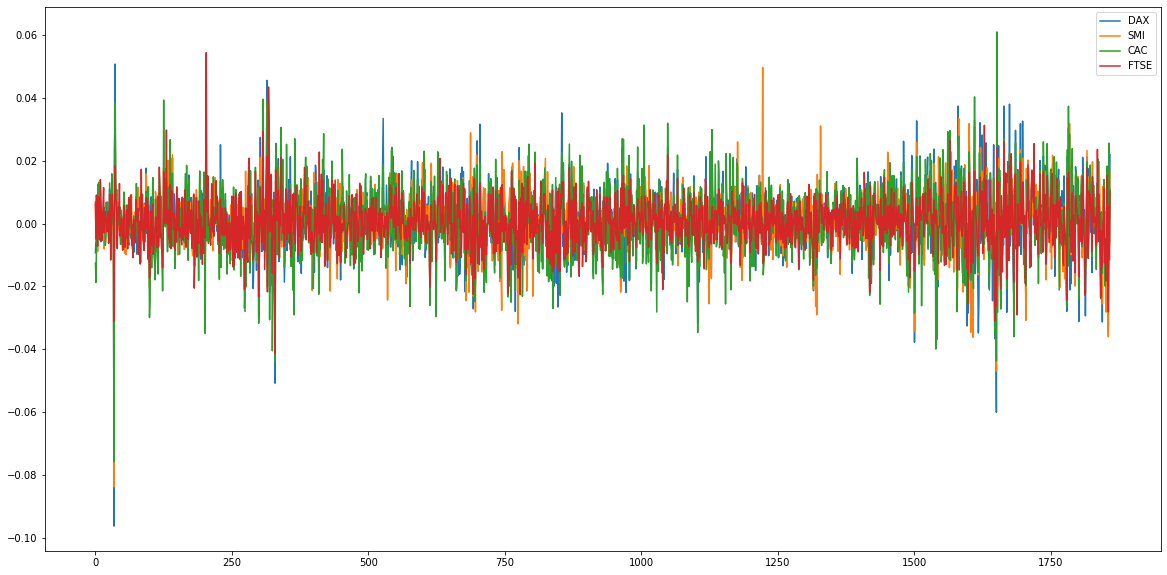

In [4]:
logdata = data.apply(np.log)
logdata = logdata.apply(np.diff)
logdata.plot(figsize=(20, 10))

# Problem 3

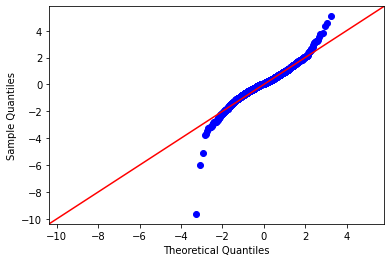

ShapiroResult(statistic=0.9538372755050659, pvalue=8.781170456587863e-24)

In [5]:
sm.qqplot(100*logdata['DAX'], line ='45')
py.show()
shapiro(logdata['DAX'])

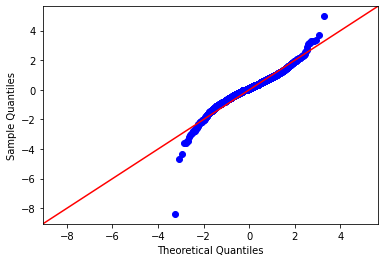

ShapiroResult(statistic=0.9553713202476501, pvalue=2.0771400254344025e-23)

In [6]:
sm.qqplot(100*logdata['SMI'], line ='45')
py.show()
shapiro(logdata['SMI'])

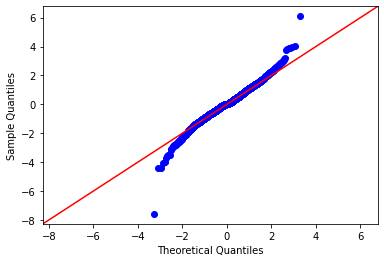

ShapiroResult(statistic=0.9820330739021301, pvalue=1.5750655581224862e-14)

In [7]:
sm.qqplot(100*logdata['CAC'], line ='45')
py.show()
shapiro(logdata['CAC'])

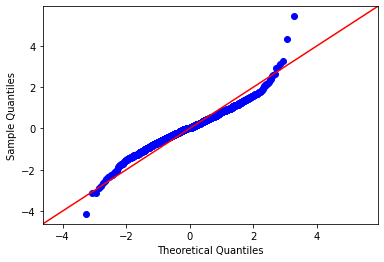

ShapiroResult(statistic=0.9799399375915527, pvalue=1.7511823849331422e-15)
ShapiroResult(statistic=0.9799399375915527, pvalue=1.7511823849331422e-15)


In [8]:
sm.qqplot(100*logdata['FTSE'], line ='45')
py.show()
print(shapiro(logdata['FTSE']))
print(shapiro(100*logdata['FTSE']))

# Problem 4 & 5

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (T

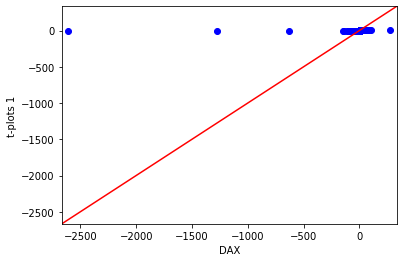

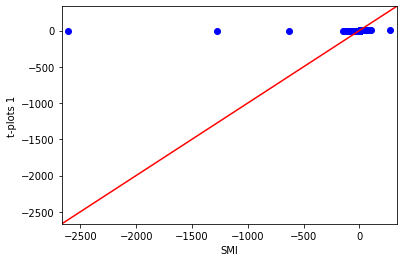

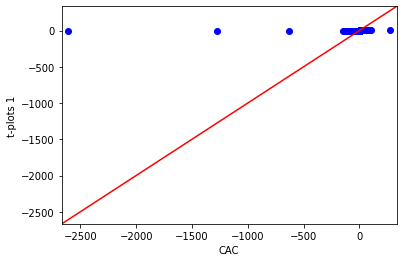

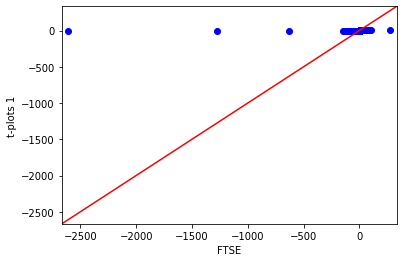

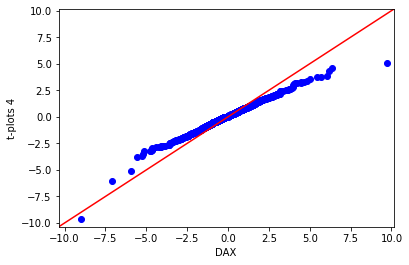

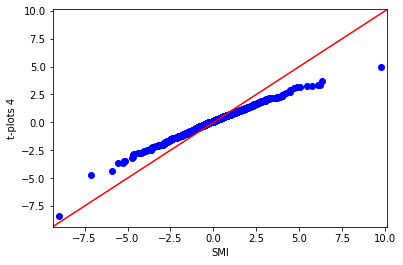

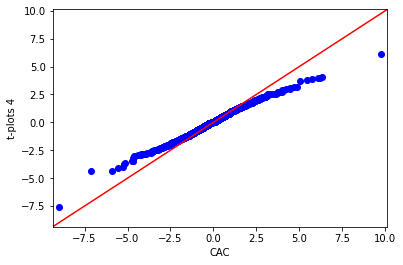

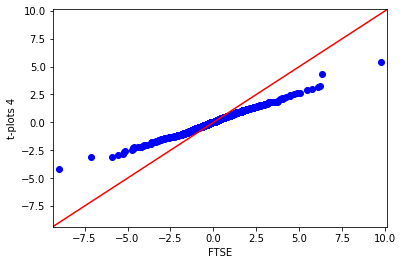

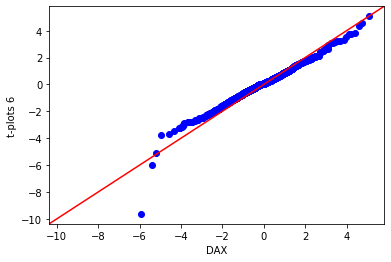

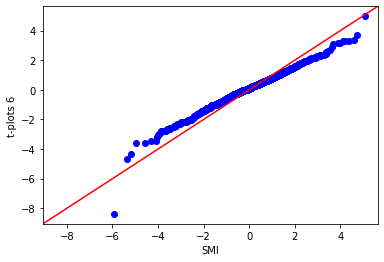

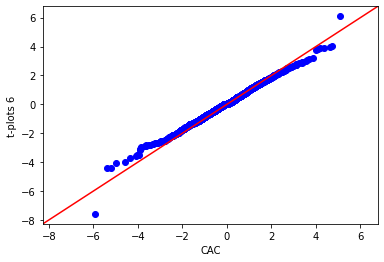

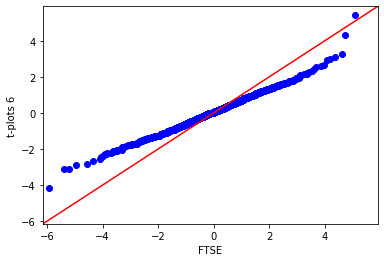

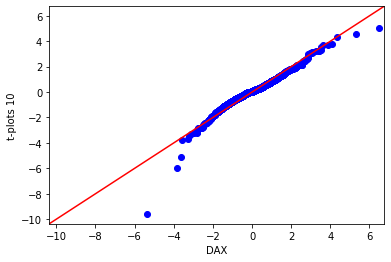

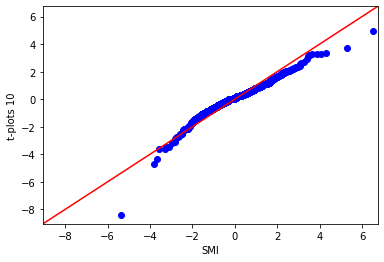

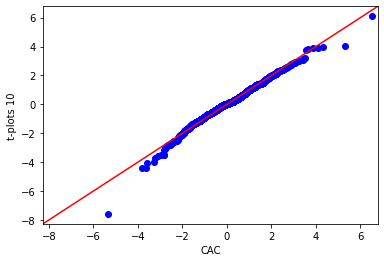

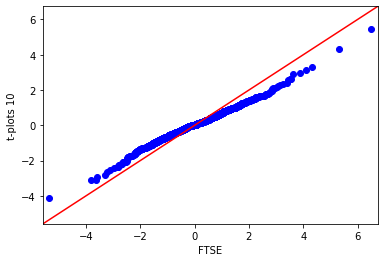

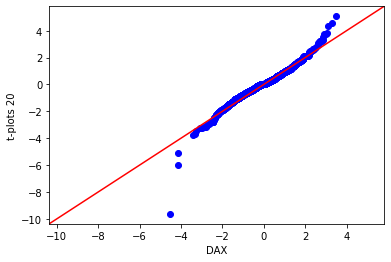

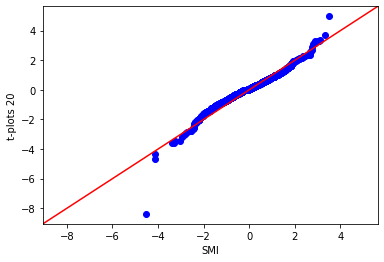

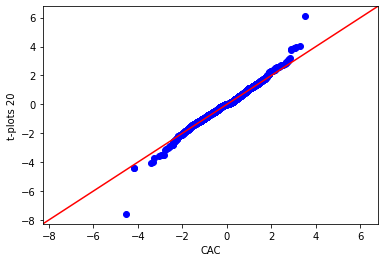

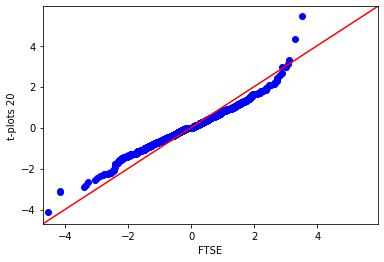

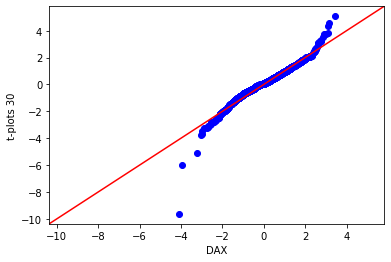

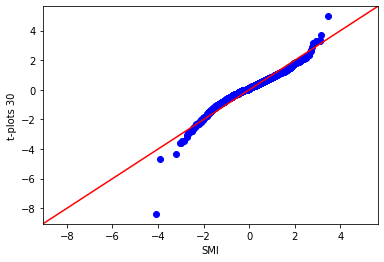

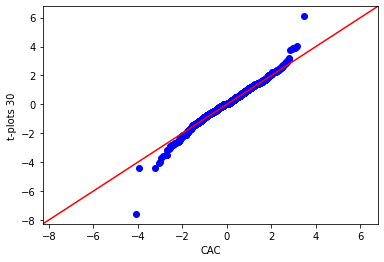

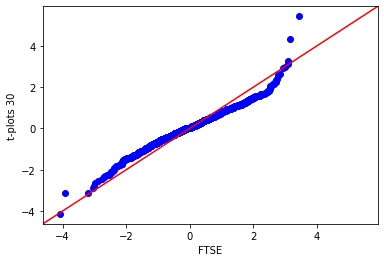

In [16]:
for i in [1, 4, 6, 10 , 20, 30]:
  tdis = t.rvs(df = i, size = logdata.shape[0])
  for col in logdata:
    sm.qqplot_2samples(100*logdata[col], tdis, line ='45')
    plt.xlabel(col)
    plt.ylabel("t-plots "+str(i))

# Problem 6 & 7

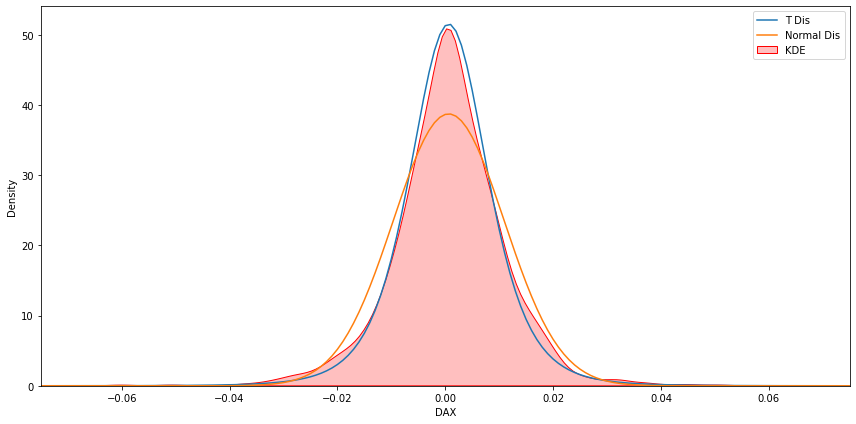

In [46]:
df = 5
m = logdata['DAX'].mean()
std = logdata['DAX'].mad()

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(start=-0.1, stop=0.1, step=0.001)
plt.plot(x, t.pdf(x, df=df, loc = m, scale = std), label='T Dis')
plt.plot(x, norm.pdf(x, loc=m, scale = logdata['DAX'].std()), label='Normal Dis')
sns.kdeplot(data = logdata, x = "DAX", color = 'red', fill = True, label='KDE', ax = ax)
ax.legend()
plt.tight_layout()
plt.xlim(-0.075, 0.075)
plt.show()

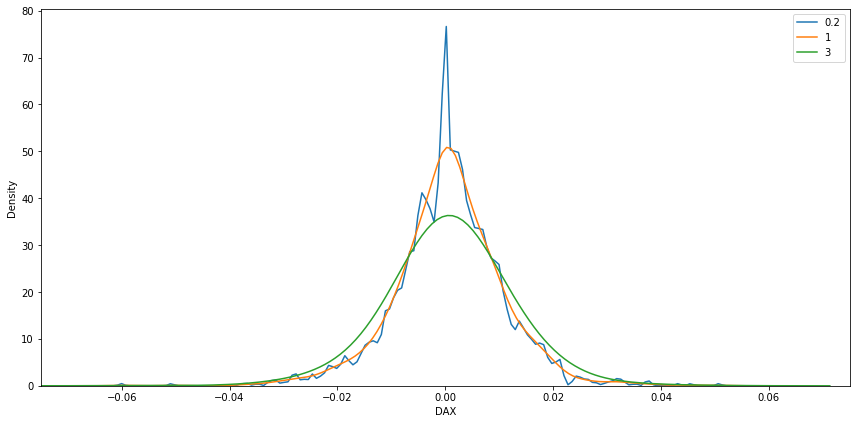

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data = logdata, x = "DAX", bw_adjust=0.2, label='0.2', ax = ax)
sns.kdeplot(data = logdata, x = "DAX", bw_adjust=1, label='1', ax = ax)
sns.kdeplot(data = logdata, x = "DAX", bw_adjust=3, label='3', ax = ax)
ax.legend()
plt.tight_layout()
plt.xlim(-0.075, 0.075)
plt.show()

# Problem 8

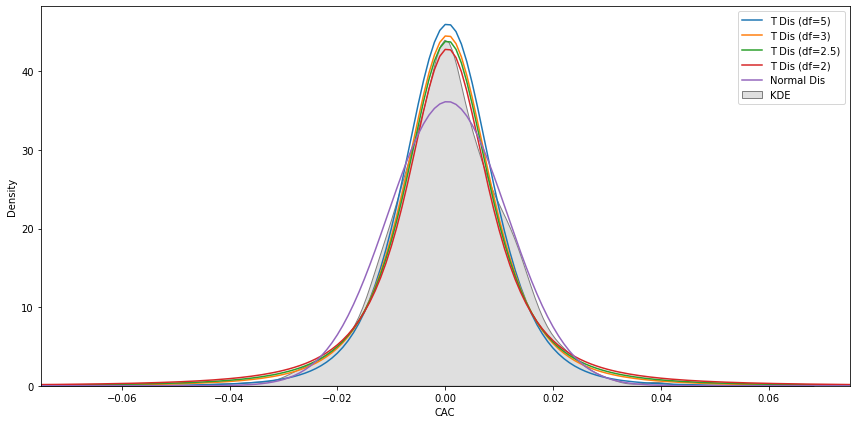

In [63]:
m = logdata['CAC'].mean()
std = logdata['CAC'].mad()

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(start=-0.1, stop=0.1, step=0.001)
plt.plot(x, t.pdf(x, df=5, loc = m, scale = std), label='T Dis (df=5)')
plt.plot(x, t.pdf(x, df=3, loc = m, scale = std), label='T Dis (df=3)')
plt.plot(x, t.pdf(x, df=2.5, loc = m, scale = std), label='T Dis (df=2.5)')
plt.plot(x, t.pdf(x, df=2, loc = m, scale = std), label='T Dis (df=2)')
plt.plot(x, norm.pdf(x, loc=m, scale = logdata['CAC'].std()), label='Normal Dis')
sns.kdeplot(data = logdata, x = "CAC", color = 'grey', fill = True, label='KDE', ax = ax)
ax.legend()
plt.tight_layout()
plt.xlim(-0.075, 0.075)
#plt.figure(figsize=(1024, 1024), dpi = 200)
plt.show()